In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the Data & Do Basic Summary

In [28]:
data = pd.read_csv('insurance.csv')

In [29]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [30]:
data.shape

(1338, 7)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [32]:
data.isnull().sum() #do not neeed to delete missing values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Text(0.5, 1.0, 'Correlation Plot')

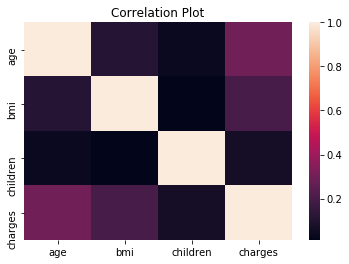

In [33]:
corr = data.corr()
ax = plt.axes()
sns.heatmap(corr)
ax.set_title('Correlation Plot')

In [34]:
data.region.value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [35]:
data.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [ ]:
plt.subplot(3,2,1)
plt.hist(data.age)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')

plt.subplot(3,2,2)
plt.hist(data.sex)
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.title('Histogram of Sex')


plt.subplot(3,2,3)
plt.hist(data.bmi)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Histogram of BMI')

plt.subplot(3,2,4)
plt.hist(data.charges)
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Histogram of Charges')

# Change Catagory Variables to be Dummy Variables 

In [41]:
#Catorgory BMI
for i in 0:len(data)
    if (data[i,'bmi'] < 18.5)

TypeError: 'int' object is not iterable

In [36]:
# Create a set of dummy variables from the sex variable
df_sex = pd.get_dummies(data['sex'])
# Join the dummy variables to the main dataframe
data = pd.concat([data, df_sex], axis=1)
data.head()

,age,sex,bmi,children,smoker,region,charges,female,male
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1


In [37]:
#region variables
df_region = pd.get_dummies(data['region'])
# Join the dummy variables to the main dataframe
data = pd.concat([data, df_region], axis=1)
data.head()

,age,sex,bmi,children,smoker,region,charges,female,male,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0,1,0,0


In [38]:
#Smoker variables
df_smoker = pd.get_dummies(data['smoker'])
# Join the dummy variables to the main dataframe
data = pd.concat([data, df_smoker], axis=1)
data.head()

,age,sex,bmi,children,smoker,region,charges,female,male,northeast,northwest,southeast,southwest,no,yes
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,0,0,1,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0,0,1,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0,0,1,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0,1,0,0,1,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0,1,0,0,1,0


In [39]:
del data['sex']
del data['region']
del data['smoker']
data.head()

,age,bmi,children,charges,female,male,northeast,northwest,southeast,southwest,no,yes
0,19,27.900,0,16884.92400,1,0,0,0,0,1,0,1
1,18,33.770,1,1725.55230,0,1,0,0,1,0,1,0
2,28,33.000,3,4449.46200,0,1,0,0,1,0,1,0
3,33,22.705,0,21984.47061,0,1,0,1,0,0,1,0
4,32,28.880,0,3866.85520,0,1,0,1,0,0,1,0
